In [1]:
import torch
from torch.utils.data import DataLoader
from pprint import pprint
import matplotlib.pyplot as plt

from EIANN import Network
import EIANN.utils as ut
import EIANN.plot as ep

ep.update_plot_defaults()

- Export the weights along the trajectory for both models
- combine
- PCA
- interpolate (+- 10%)
- create set of weights
- probe loss of both networks
    - convert BP net to ReLU before computing loss
- plot 2D loss landscape as 3D heatmap (including 2 actual trajectories, plot separately)

In [2]:
input_size = 21
dataset = torch.eye(input_size)
target = torch.eye(dataset.shape[0])

data_seed = 0
data_generator = torch.Generator()
sample_indexes = torch.arange(len(dataset))
dataloader = DataLoader(list(zip(sample_indexes, dataset, target)), shuffle=True, generator=data_generator)

epochs=30
seed=42

### Gjorgjieva learning rule

In [3]:
network_config = ut.read_from_yaml('../optimize/data/20220902_EIANN_1_hidden_Gjorgieva_Hebb_config_A.yaml')
layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

gj_network = Network(layer_config, projection_config, seed=seed, **training_kwargs)

Epochs:   0%|          | 0/30 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

Samples:   0%|          | 0/21 [00:00<?, ?it/s]

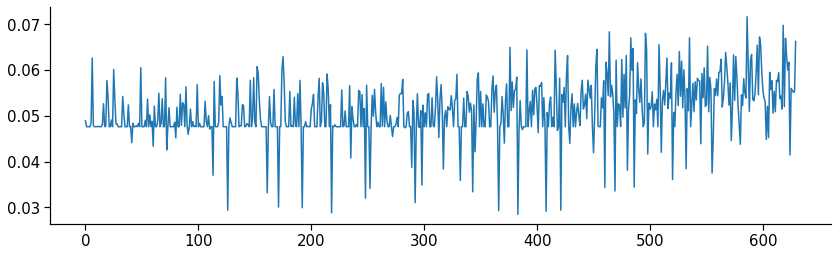

In [4]:
data_generator.manual_seed(data_seed)
gj_network.train(dataloader, epochs, store_history=True, status_bar=True)

plt.plot(gj_network.loss_history)
plt.show()

In [ ]:
network = gj_network

# 1. Measure loss on re-sorted activity in every epoch of the training (from output activity history)
output_layer = list(network)[-1]
output_pop = output_layer.E

history_len = output_pop.activity_history.shape[0]

for i in range(history_len):
    state_dict = network.param_history[i]
    network_snapshot = Network(layer_config, projection_config, seed=seed, **training_kwargs)
    network_snapshot.load_state_dict(state_dict)
    
    network_snapshot.forward(test_dataloader)
        

# for every point in train history, pull out weights, probe network on full test set (single big batch), 
# get average activity for each class, sort avg activity matrix to minimize loss, save loss & sort idx


In [ ]:

# argmax_correct = []
# # num_timesteps = output_pop.activity_history.shape[1]
# # num_units = output_pop.activity_history.shape[2]
# num_epochs = history_len // network.num_samples
# output_history = output_pop.activity_history.view(num_epochs,network.num_samples,10,21)

# sorted_idx = network.sorted_sample_indexes.view(num_epochs,network.num_samples)
# target_history = 

# losses = []
# for epoch in range(num_epochs):
#     epoch_activity = output_history[epoch,:,-1,:]
#     epoch_target = 
    
    
    
    
#     sorted_idx = ut.get_diag_argmax_row_indexes(epoch_activity)
#     epoch_loss = network.criterion(epoch_activity[sorted_idx],target[sorted_idx])
#     losses.append(epoch_loss)
    
    
    
    
    
#     plt.imshow(epoch_activity)
#     break

#      sample_idx = network.sample_order[i]
#     sample_target = target[sample_idx, :]
#     output = output_pop.activity_history[i, -1, sorted_idx]
#     loss = network.criterion(output, sample_target)
    
    
# # 2. Pick sorting with lowest loss over training


In [ ]:

# # 3. Apply sorting to full output activity history to get new loss history

# # 4. Apply sorting to full weight history

# # 5. Compute loss landscape on new weight history



# final_output = output_pop.activity_history[network.sorted_sample_indexes, -1, :][-target.shape[0]:, :].T
# sorted_idx = get_diag_argmax_row_indexes(final_output)
# loss_history = []
# for i in range(output_pop.activity_history.shape[0]):
#     sample_idx = network.sample_order[i]
#     sample_target = target[sample_idx, :]
#     output = output_pop.activity_history[i, -1, sorted_idx]
#     loss = network.criterion(output, sample_target)
#     loss_history.append(loss)
#     argmax_correct.append(torch.argmax(output) == torch.argmax(sample_target))
# loss_history = torch.tensor(loss_history)
# argmax_correct = torch.tensor(argmax_correct)

# epoch_argmax_accuracy = []
# start = 0
# while start < len(argmax_correct):
#     epoch_argmax_accuracy.append(torch.sum(argmax_correct[start:start+target.shape[0]]) / target.shape[0] * 100.)
#     start += target.shape[0]

# epoch_argmax_accuracy = torch.tensor(epoch_argmax_accuracy)


In [ ]:
ep.plot_weight_history_PCs(gj_network)

In [ ]:
ds = [x for x in zip(dataset,target)]
test_dataloader = DataLoader(ds, batch_size=1)
ep.plot_loss_landscape(gj_network, test_dataloader, num_points=20)

### Backprop (softplus; SGD)

In [ ]:
network_config = ut.read_from_yaml('../config/EIANN_1_hidden_backprop_softplus_SGD_matched_config.yaml')
layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

bp_network = Network(layer_config, projection_config, seed=seed, **training_kwargs)

In [ ]:
# Initialize backprop net with same weights as Gjorg. init
for i,gj_projection in enumerate(gj_network.module_list):
    bp_network.module_list[i].weight.data = gj_projection.weight_history[0].clone()

# for gj_layer,bp_layer in zip(gj_network,bp_network):
#     for gj_pop,bp_pop in zip(gj_layer,bp_layer):
#         for gj_proj,bp_proj in zip(gj_pop,bp_pop):
#             bp_proj.weight.data = gj_proj.weight_history[0].clone()

In [ ]:
data_generator.manual_seed(data_seed)
bp_network.train(dataloader, epochs, store_history=True, status_bar=True)

plt.plot(bp_network.loss_history)
plt.show()

In [ ]:
ep.plot_weight_history_PCs(bp_network)

In [ ]:
ep.plot_loss_landscape(bp_network, test_dataloader, num_points=20)

## Combined loss landscape

In [ ]:
ep.plot_combined_loss_landscape(gj_network, bp_network, test_dataloader, num_points=20)